Ly Nguyen 

Problem Set 3 

PART 1 - Finite Sample Bias 

In [5]:
import numpy as np 
from numpy import random as rand
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

In [8]:
# Parameters

alpha= 0 
theta = 0
beta = .015
sigmaU = .053
sigmaV = .044
rho = .98
RhoUV = -.8
sigmaUV = RhoUV*sigmaU*sigmaV

T = [120,240,360,480,600,720,840,960,1080,1200]
B = 250

In [9]:
def repeatme(length, sigmaU=sigmaU, sigmaV=sigmaV, simrho=rho, simsigmaUV=sigmaUV):
    xt = []
    rt = []
    x = 0
    xt.append(x)

    mean = [0,0]
    covariancemat = [[sigmaU**2,simsigmaUV],[simsigmaUV,sigmaV**2]]
    for i in range (length - 1):
        u,v = np.random.default_rng().multivariate_normal(mean, covariancemat).T
        r = 0 + beta*x + u
        x = 0 + rho*x + v
        xt.append(x)
        rt.append(r)
    xt.pop()
    return xt, rt 


figs = []
for t in T:
    betalist = []
    for rep in range(B):
        thisrep = repeatme(t)
        a = np.array(thisrep[0]).reshape(-1,1)
        b = np.array(thisrep[1])
        model = LinearRegression(fit_intercept=True).fit(a,b)
        estbeta = model.coef_[0]
        betalist.append(estbeta)
    print(len(betalist))
    print(betalist)
    betalist = np.array(betalist)
    average = np.mean(betalist)
    perc5 = np.percentile(betalist,5)
    perc95 = np.percentile(betalist,95)
    figs.append([t,average,perc5,perc95])

print(figs) 


250
[0.08329496823569256, 0.011253263499653676, 0.010851113457618985, 0.12363588970519035, 0.1489715465136246, 0.12461733770248133, 0.07858112872693339, 0.10630794461100182, 0.1107700661368092, 0.003450570327247222, 0.022009879220100493, 0.09336490512476103, 0.0902176957874978, 0.10387460273600126, 0.045060204249906276, 0.03520327727749231, 0.03783589961070921, 0.05261380931882606, 0.08271561523578362, 0.0574066406881843, 0.05621598635160959, 0.009683412462975393, 0.05710251607704, 0.08028812495091765, 0.03615355765704462, 0.014409742489012377, 0.026545260851277633, 0.14340534769495583, 0.023887041283815608, 0.05602069653079038, -0.001952905320041153, 0.025538758876986138, 0.0062464430535512224, 0.07436284244373075, 0.04264352233292062, 0.027622794319729818, 0.02311875505360786, 0.03820769330683054, 0.019986790619261723, 0.08396480628818499, 0.07807757572177793, 0.022812674932056427, 0.08403309058504504, -0.016184835116508103, 0.04476653178630195, 0.03566862280289626, 0.055694948449048

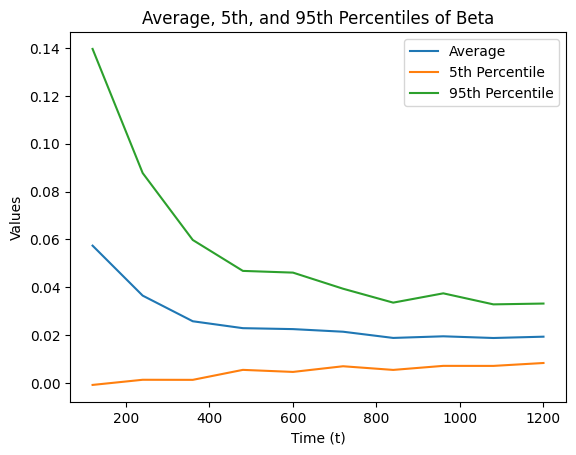

In [20]:
data = figs

t_values = [item[0] for item in data]
ave_values = [item[1] for item in data]
percentile_5th_values = [item[2] for item in data]
percentile_95th_values = [item[3] for item in data]

# Plot 
plt.plot(t_values, ave_values, label='Average')
plt.plot(t_values, percentile_5th_values, label='5th Percentile')
plt.plot(t_values, percentile_95th_values, label='95th Percentile')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Average, 5th, and 95th Percentiles of Beta')
plt.legend()

plt.show()

What happens to the bias in Beta as we use more data to estimate the predictive regression? 

Answers: As the sample size increases (T increases), the bias in Beta decreases. From the plot, we see that the average value of Beta converges closer to the true value of Beta and becomes a more consistent estimator. 

PART 2 - EFFECT OF RESIDUAL CORRELATION 

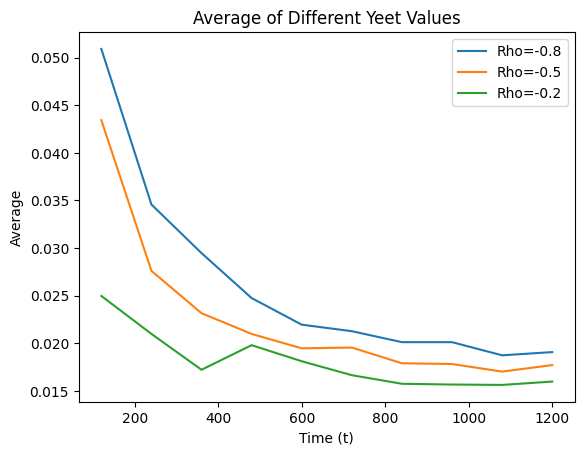

In [19]:
# Parameters

rhovals = [-.2,-.5,-.8]
alpha= 0 
theta = 0
beta = .015
sigmaU = .053
sigmaV = .044
rho = .98

T = [120,240,360,480,600,720,840,960,1080,1200]
B = 250
rhofigs = []
for yeet in rhovals:
    yeesigmaUV = yeet*sigmaU*sigmaV
    for t in T:
        betalist = []
        for rep in range(B):
            thisrep = repeatme(t,simsigmaUV=yeesigmaUV)
            a = np.array(thisrep[0]).reshape(-1,1)
            b = np.array(thisrep[1])
            model = LinearRegression(fit_intercept=True).fit(a,b)
            estbeta = model.coef_[0]
            betalist.append(estbeta)
        betalist = np.array(betalist)
        average = np.mean(betalist)
        perc5 = np.percentile(betalist,5)
        perc95 = np.percentile(betalist,95)
        rhofigs.append([t,average,perc5,perc95,yeet]) 

data = rhofigs 
t_values = [item[0] for item in data]
yeet_values = sorted(set([item[4] for item in data]))

# Plotting
for yeet in yeet_values:
    ave_values = [item[1] for item in data if item[4] == yeet]
    plt.plot(t_values[:len(ave_values)], ave_values, label=f'Rho={yeet}')
plt.xlabel('Time (t)')
plt.ylabel('Average')
plt.title('Average of Different Yeet Values')
plt.legend() 

plt.show() 

How does rho and sigma affect the bias? 

Answers: From the plot, we observe that as rho increases, the estimated Beta diverges away from the true value of Beta when the sample size (T) is small, which indicates that a higher correlatio  between residuals would result in a higher initial bias in the estimated value of Beta. On the other hand, as the sample size (T) increases, the bias caused by rho diminishes and the estimated Beta converges to the true value of Beta, which indicates that a larger sample size would provide more information and reduce the bias.